In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import math as mp 
import seaborn as sns
%matplotlib inline

## Importation des données  : 

In [2]:
Sinistre=pd.read_excel("Sinistre_Fraude.xlsx") 

In [3]:
Assure=pd.read_excel('NewAssure.xlsx')

In [4]:
Police= pd.read_csv("NewPolice.csv",sep=',') 

C:\Users\chihe\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
BonusMalus=pd.read_excel('NewBonusMalus.xlsx')

## Analyse exploratoire  : 

### Le pourcentage des valeurs manquantes de chaque table : 

In [6]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

###  1) Table Sinistre  : 

In [7]:
draw_missing_data_table(Sinistre)

Total  Percent
energie                          1  0.00011
Unnamed: 0                       0  0.00000
secteur_activite                 0  0.00000
Fraude                           0  0.00000
Marque                           0  0.00000
puissanceFiscal                  0  0.00000
dateInsertion                    0  0.00000
naturePolice                     0  0.00000
dateEffetPolice                  0  0.00000
ancienne_compagnie               0  0.00000
age_vehicule                     0  0.00000
usage                            0  0.00000
compagnie_actuelle               0  0.00000
date_permis                      0  0.00000
gouvernorat                      0  0.00000
CodeSinistre_id                  0  0.00000
age                              0  0.00000
gender                           0  0.00000
id_assure_adverse                0  0.00000
CodePolice_Adverse               0  0.00000
Calculer_Sinistre                0  0.00000
natureDuSinistre                 0  0.00000
pourcentadeDeResponsabilite      0  0.00000
lieuDuSinistre                   0  0.00000
dateOuvertureDuSinistre          0  0.00000
id_assure                        0  0.00000
CodeVehicule_id                  0  0.00000
id_police                        0  0.00000
nbsinistre                       0  0.00000

In [8]:
Sinistre.columns

Index(['Unnamed: 0', 'CodeSinistre_id', 'id_police', 'CodeVehicule_id',
       'id_assure', 'dateOuvertureDuSinistre', 'lieuDuSinistre',
       'pourcentadeDeResponsabilite', 'natureDuSinistre', 'Calculer_Sinistre',
       'CodePolice_Adverse', 'id_assure_adverse', 'gender', 'age',
       'gouvernorat', 'secteur_activite', 'date_permis', 'compagnie_actuelle',
       'usage', 'age_vehicule', 'ancienne_compagnie', 'dateEffetPolice',
       'naturePolice', 'dateInsertion', 'energie', 'puissanceFiscal', 'Marque',
       'Fraude', 'nbsinistre'],
      dtype='object')

In [9]:
Sinistre.shape

(9079, 29)

In [10]:
Sinistre=Sinistre.drop(['Unnamed: 0'],axis=1)

#### Comparison entre les  sinistres corporel / matériel  :  

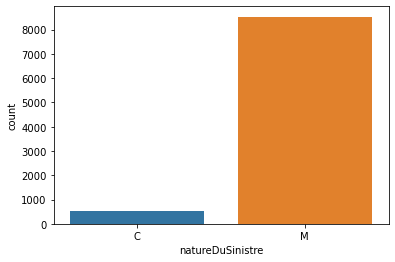

In [11]:
sns.countplot("natureDuSinistre", data=Sinistre)

In [12]:
Sinistre_Corporel=Sinistre.query('natureDuSinistre=="C" ')

### 2) Table Assure : 

In [13]:
draw_missing_data_table(Assure)

Total  Percent
Unnamed: 0              0      0.0
key_0                   0      0.0
CodeAssure_id           0      0.0
_id                     0      0.0
gender                  0      0.0
age                     0      0.0
gouvernorat             0      0.0
secteur_activite        0      0.0
date_permis             0      0.0
compagnie_actuelle      0      0.0
usage                   0      0.0
age_vehicule            0      0.0
nb_sinistres            0      0.0
ancienne_compagnie      0      0.0
satisfaction            0      0.0

In [14]:
Assure.columns

Index(['Unnamed: 0', 'key_0', 'CodeAssure_id', '_id', 'gender', 'age',
       'gouvernorat', 'secteur_activite', 'date_permis', 'compagnie_actuelle',
       'usage', 'age_vehicule', 'nb_sinistres', 'ancienne_compagnie',
       'satisfaction'],
      dtype='object')

In [15]:
type(Assure)

pandas.core.frame.DataFrame

In [16]:
Assure.shape

(35174, 15)

In [17]:
Assure=Assure.drop(['Unnamed: 0','key_0'],axis=1)

#### Assures / Secteur d'activite  : 

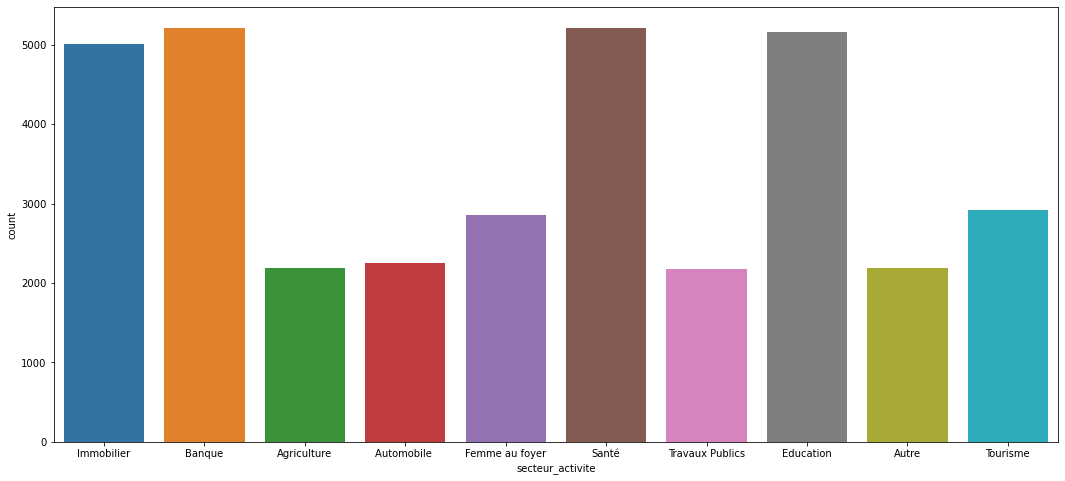

In [18]:
plt.figure(figsize=(18, 8))
sns.countplot("secteur_activite", data=Assure)

#### Assure - Nombre Sinistre corporel : 

In [19]:
Assure_Sinistre_Corporel=Sinistre_Corporel.groupby(['id_assure'])['natureDuSinistre'].count()
Assure_c=[]
Nb_Sinistre_c=[] 
for assure,nb_sinistre_c in Assure_Sinistre_Corporel.items(): 
    Assure_c.append(assure)
    Nb_Sinistre_c.append(nb_sinistre_c)

In [20]:
Assure_Corporel=pd.DataFrame({"CodeAssure_id":Assure_c,"Nb_Sinistre_c":Nb_Sinistre_c}) 

#### Assure - Nombre Total Sinistres : 

In [21]:
Assure_Sinistre=Sinistre.groupby(['id_assure'])['CodeSinistre_id'].count()
Assure_t=[]
Nb_Sinistre=[]
for assure,nb_sinistre in Assure_Sinistre.items(): 
    Assure_t.append(assure)
    Nb_Sinistre.append(nb_sinistre)

In [22]:
Assure_Sinistre_total=pd.DataFrame({"CodeAssure_id":Assure_t,"NombreTotalSinistres":Nb_Sinistre}) 

#### Jointure entre les deux Tables : 

In [23]:
Assure_Sinistres=pd.merge(Assure_Corporel,Assure_Sinistre_total,how="right",on="CodeAssure_id")

In [24]:
draw_missing_data_table(Assure_Sinistres)

Total   Percent
Nb_Sinistre_c          3823  0.905281
CodeAssure_id             0  0.000000
NombreTotalSinistres      0  0.000000

##### Les valeurs nuls dans la colonne 'Nb_Sinistre_c' nous indique que les assurés n'ont pas eu des sinistre corporels , alors on va remplacer ces valeurs nuls par des zéros 

In [25]:
Assure_Sinistres['Nb_Sinistre_c']=Assure_Sinistres['Nb_Sinistre_c'].fillna(0)
Assure_Sinistres['Nb_Sinistre_c']=Assure_Sinistres['Nb_Sinistre_c'].astype(int)

### 3) Table Police : 

In [26]:
draw_missing_data_table(Police)

Total   Percent
dateEcheancePolice  107475  0.104345
CodePolice_id            0  0.000000
Etat_Police              0  0.000000
codeAgence               0  0.000000
codeCompagnie            0  0.000000
dateEffetPolice          0  0.000000
naturePolice             0  0.000000
numPolice                0  0.000000
typeIntermediaire        0  0.000000
typePolice               0  0.000000

In [27]:
Police.columns

Index(['CodePolice_id', 'Etat_Police', 'codeAgence', 'codeCompagnie',
       'dateEcheancePolice', 'dateEffetPolice', 'naturePolice', 'numPolice',
       'typeIntermediaire', 'typePolice'],
      dtype='object')

In [28]:
Police.shape

(1030000, 10)

### 4) Table BonusMalus : 

In [29]:
draw_missing_data_table(BonusMalus)

Total  Percent
CodeBonusMalus_id              0      0.0
CodePolice_id                  0      0.0
CodeVehicule_id                0      0.0
CodeAssure_id                  0      0.0
CodeSouscripteur_id            0      0.0
codeUsage                      0      0.0
ETAT_VEHICULE                  0      0.0
DATE_AFFECTATION               0      0.0
classeBonusMalus               0      0.0
classeBonusMalusCompagnie      0      0.0
coefBonusMalus                 0      0.0

In [30]:
BonusMalus.columns

Index(['CodeBonusMalus_id', 'CodePolice_id', 'CodeVehicule_id',
       'CodeAssure_id', 'CodeSouscripteur_id', 'codeUsage', 'ETAT_VEHICULE',
       'DATE_AFFECTATION', 'classeBonusMalus', 'classeBonusMalusCompagnie',
       'coefBonusMalus'],
      dtype='object')

In [31]:
BonusMalus.shape

(637267, 11)

In [32]:
BonusMalus['DATE_AFFECTATION']=pd.to_datetime(BonusMalus['DATE_AFFECTATION'], format='%Y-%m-%d')

## BonusMalus 2015 : 

In [33]:
BonusMalus_2015 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2015-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2015-12-31')]

In [34]:
Assure_2015_Fraude=BonusMalus_2015.groupby('CodeAssure_id').size().sort_values(ascending=False).head(12)

In [35]:
Assure_2015_Fraude

CodeAssure_id
53968      425
213237      15
416408       9
129532       8
51749        6
241780       5
653678       5
548137       5
241608       5
1026639      5
1046672      4
1037009      4
dtype: int64

## BonusMalus 2016 : 

In [36]:
BonusMalus_2016 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2016-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2016-12-31')]

In [37]:
Assure_2016_=BonusMalus_2016.groupby('CodeAssure_id').size().sort_values(ascending=False).head(12)

In [38]:
Assure_2016_

CodeAssure_id
53968     1581
36330      150
46811      102
45825       87
53642       77
53806       63
53681       51
5817        40
36108       33
71676       28
26538       27
546392      24
dtype: int64

## BonusMalus 2017 : 

In [39]:
BonusMalus_2017 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2017-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2017-12-31')]

In [40]:
Assure_2017_Fraude=BonusMalus_2017.groupby('CodeAssure_id').size().sort_values(ascending=False).head(1760)

In [41]:
Assure_2017_Fraude

CodeAssure_id
53968     1565
36330      381
36108      185
45825      165
46811      152
          ... 
300127       4
559383       4
336976       4
51789        4
90975        4
Length: 1760, dtype: int64

## BonusMalus 2018 : 

In [42]:
BonusMalus_2018 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2018-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2018-12-31')]

In [43]:
Assure_2018_Fraude=BonusMalus_2018.groupby('CodeAssure_id').size().sort_values(ascending=False).head(185)

In [44]:
Assure_2018_Fraude

CodeAssure_id
300935     987
301091     952
300754     841
300600     817
36330      133
          ... 
63090        4
1049309      4
1073646      4
227065       4
54306        4
Length: 185, dtype: int64

## BonusMalus 2019 : 

In [45]:
BonusMalus_2019 = BonusMalus.loc[(BonusMalus['DATE_AFFECTATION'] >= '2019-01-01') & (BonusMalus['DATE_AFFECTATION'] < '2019-12-31')]

In [46]:
Assure_2019_=BonusMalus_2019.groupby('CodeAssure_id').size().sort_values(ascending=False).head(10)

In [47]:
Assure_2019_

CodeAssure_id
100573    2
778115    2
778175    2
5723      1
778136    1
778134    1
778119    1
778106    1
778100    1
778098    1
dtype: int64

## Seulement les données de l'année 2016 et 2019 semblent correctes et bien saisies , les données des autres années contiennent des anomalies  

## Correspondances BonusMalus-Assure : 

In [48]:
BonusMalus_Assure=BonusMalus.CodeAssure_id.isin(Assure.CodeAssure_id).value_counts()

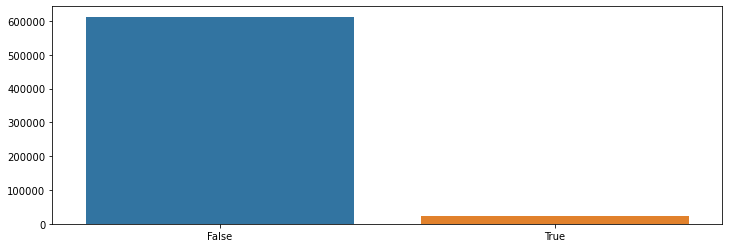

In [49]:
plt.figure(figsize=(12, 4))
sns.barplot(BonusMalus_Assure.index, BonusMalus_Assure.values)

### Table Bonus Malus : Supprimer Les lignes des assurés qui n'existent pas dans la table Assure   

In [50]:
BonusMalus=BonusMalus[BonusMalus.CodeAssure_id.isin(Assure.CodeAssure_id)]

### Table Assure : Supprimer Les lignes des assurés qui n'existent pas dans la table BonusMalus   

In [51]:
Assure=Assure[Assure.CodeAssure_id.isin(BonusMalus.CodeAssure_id)]

## Correspondance entre table générée :  Assure_Sinistres et la table Assure 

In [52]:
Assure_Sinistres=Assure_Sinistres[Assure_Sinistres.CodeAssure_id.isin(Assure.CodeAssure_id)]

In [53]:
Assure_Sinistres.CodeAssure_id.isin(Assure.CodeAssure_id).value_counts()

True    2059
Name: CodeAssure_id, dtype: int64

## Correspondance entre table : Assure et la table géneré Assure_Sinistres

In [54]:
Assure.CodeAssure_id.isin(Assure_Sinistres.CodeAssure_id).value_counts()

False    12793
True      2059
Name: CodeAssure_id, dtype: int64

#### on va ajouter 12793 assurés a la nouvelle table géneré avec un nombre de sinistre égale à zéro 

#### 1) Faire une jointure entre les deux tables Bonus Malus - Assure pour ajouter d'autre axes d'analyse  : 
       -Date Affectation
       -Classe BonusMalus Compagnie 

In [55]:
Assure=pd.merge(BonusMalus[['CodeAssure_id','CodePolice_id','classeBonusMalusCompagnie','DATE_AFFECTATION']],Assure,how='inner',on='CodeAssure_id')

#### Faire une jointure entre la table assure et la nouvelle table géneré pour affecter a chaque assuré le nombre de sinistre et le nombre de sinistre corporel  

In [56]:
Assure=pd.merge(Assure_Sinistres,Assure,how='right',on='CodeAssure_id')

In [57]:
Assure.columns

Index(['CodeAssure_id', 'Nb_Sinistre_c', 'NombreTotalSinistres',
       'CodePolice_id', 'classeBonusMalusCompagnie', 'DATE_AFFECTATION', '_id',
       'gender', 'age', 'gouvernorat', 'secteur_activite', 'date_permis',
       'compagnie_actuelle', 'usage', 'age_vehicule', 'nb_sinistres',
       'ancienne_compagnie', 'satisfaction'],
      dtype='object')

In [58]:
Assure['Nb_Sinistre_c']=Assure['Nb_Sinistre_c'].fillna(0)
Assure['NombreTotalSinistres']=Assure['NombreTotalSinistres'].fillna(0)
Assure['Nb_Sinistre_c']=Assure['Nb_Sinistre_c'].astype(int)
Assure['NombreTotalSinistres']=Assure['NombreTotalSinistres'].astype(int)

In [59]:
Assure

CodeAssure_id  Nb_Sinistre_c  NombreTotalSinistres  CodePolice_id  \
0             101831              0                     0         116233   
1             102130              0                     0         116574   
2             102130              0                     0         281078   
3             102258              0                     0         116723   
4              93547              0                     6         116969   
...              ...            ...                   ...            ...   
24542          29485              0                     0          36150   
24543          30248              0                     1          36167   
24544          30454              0                     1          36458   
24545          30475              0                     0          36479   
24546          30716              0                     0          36723   

       classeBonusMalusCompagnie DATE_AFFECTATION  _id  gender  age  \
0                              3       2017-07-15  937  female   37   
1                              3       2017-07-19  938    male   30   
2                              1       2017-10-10  938    male   30   
3                              1       2017-07-22  939    male   36   
4                              2       2017-07-25  895  female   21   
...                          ...              ...  ...     ...  ...   
24542                          4       2016-04-16   63  female   36   
24543                          2       2017-05-09   78    male   33   
24544                          1       2016-07-22   81    male   37   
24545                          1       2016-06-08   82    male   26   
24546                          5       2016-05-28   86    male   38   

      gouvernorat secteur_activite date_permis compagnie_actuelle  \
0           Tunis        Education    7/8/2017      Assurance Ami   
1          Sousse       Immobilier  18/11/2019          Maghrebia   
2          Sousse       Immobilier  18/11/2019          Maghrebia   
3          Ariana            Autre  28/10/2003              Comar   
4           Gabes            Santé  14/10/2018    Zitouna takaful   
...           ...              ...         ...                ...   
24542      Ariana   Femme au foyer   22/1/2009    Zitouna takaful   
24543    Monastir            Autre    2/6/2007   El amana takaful   
24544      Mahdia        Education   2/10/2016      Assurance Ami   
24545      Ariana      Automobile    24/7/2020      Assurance Ami   
24546     B.Arous            Autre   18/7/2003               Star   

               usage  age_vehicule  nb_sinistres ancienne_compagnie  \
0      Professionnel             8             4              Ctama   
1              Privé            19             0     Biat-assurance   
2              Privé            19             0     Biat-assurance   
3         Auto-Ecole            15             2             Aucune   
4              Privé            16             3     Biat-assurance   
...              ...           ...           ...                ...   
24542  Professionnel             2             0     Biat-assurance   
24543     Auto-Ecole            15             2          Maghrebia   
24544  Professionnel             4             3             Aucune   
24545  Professionnel            20             2             Aucune   
24546         Louage             5             3                Gat   

       satisfaction  
0                 3  
1                 1  
2                 1  
3                 4  
4                 2  
...             ...  
24542             2  
24543             1  
24544             5  
24545             4  
24546             3  

[24547 rows x 18 columns]

### Faire une jointure entre la table Assure et la table Police pour ajouter la date de signature du contrat d'assurance afin de calculer la duree entre la date effet police et la date d'affectation de la classe bonus Malus

In [60]:
Assure=pd.merge(Assure,Police[['CodePolice_id','dateEffetPolice','Etat_Police','naturePolice','typeIntermediaire']],how='inner',on='CodePolice_id')

In [61]:
Assure

CodeAssure_id  Nb_Sinistre_c  NombreTotalSinistres  CodePolice_id  \
0             101831              0                     0         116233   
1             102130              0                     0         116574   
2             102130              0                     0         281078   
3             102258              0                     0         116723   
4              93547              0                     6         116969   
...              ...            ...                   ...            ...   
24542          29485              0                     0          36150   
24543          30248              0                     1          36167   
24544          30454              0                     1          36458   
24545          30475              0                     0          36479   
24546          30716              0                     0          36723   

       classeBonusMalusCompagnie DATE_AFFECTATION  _id  gender  age  \
0                              3       2017-07-15  937  female   37   
1                              3       2017-07-19  938    male   30   
2                              1       2017-10-10  938    male   30   
3                              1       2017-07-22  939    male   36   
4                              2       2017-07-25  895  female   21   
...                          ...              ...  ...     ...  ...   
24542                          4       2016-04-16   63  female   36   
24543                          2       2017-05-09   78    male   33   
24544                          1       2016-07-22   81    male   37   
24545                          1       2016-06-08   82    male   26   
24546                          5       2016-05-28   86    male   38   

      gouvernorat  ... compagnie_actuelle          usage age_vehicule  \
0           Tunis  ...      Assurance Ami  Professionnel            8   
1          Sousse  ...          Maghrebia          Privé           19   
2          Sousse  ...          Maghrebia          Privé           19   
3          Ariana  ...              Comar     Auto-Ecole           15   
4           Gabes  ...    Zitouna takaful          Privé           16   
...           ...  ...                ...            ...          ...   
24542      Ariana  ...    Zitouna takaful  Professionnel            2   
24543    Monastir  ...   El amana takaful     Auto-Ecole           15   
24544      Mahdia  ...      Assurance Ami  Professionnel            4   
24545      Ariana  ...      Assurance Ami  Professionnel           20   
24546     B.Arous  ...               Star         Louage            5   

      nb_sinistres  ancienne_compagnie  satisfaction dateEffetPolice  \
0                4               Ctama             3      2017-07-15   
1                0      Biat-assurance             1      2017-07-19   
2                0      Biat-assurance             1      2017-10-10   
3                2              Aucune             4      2017-07-22   
4                3      Biat-assurance             2      2017-07-25   
...            ...                 ...           ...             ...   
24542            0      Biat-assurance             2      2016-04-16   
24543            2           Maghrebia             1      2016-05-09   
24544            3              Aucune             5      2008-07-22   
24545            2              Aucune             4      2009-06-08   
24546            3                 Gat             3      2013-05-28   

       Etat_Police naturePolice typeIntermediaire  
0                V            R                 1  
1                V            R                 1  
2                V            R                 1  
3                V            R                 2  
4                V            R                 1  
...            ...          ...               ...  
24542            R            R                 1  
24543            V            R                 1  
24544            R            R

In [62]:
dates_affectation=[]
for i in Assure['DATE_AFFECTATION'] : 
    dates_affectation.append(pd.to_datetime(i).year)

In [63]:
dates_effet=[]
for i in Assure['dateEffetPolice'] : 
    dates_effet.append(pd.to_datetime(i).year)

In [64]:
Duree=[] 
for i in range(0,len(dates_affectation)) : 
    Duree.append(dates_affectation[i]-dates_effet[i])

In [65]:
Assure.insert(3,"Duree",Duree,True)

In [66]:
Assure

CodeAssure_id  Nb_Sinistre_c  NombreTotalSinistres  Duree  \
0             101831              0                     0      0   
1             102130              0                     0      0   
2             102130              0                     0      0   
3             102258              0                     0      0   
4              93547              0                     6      0   
...              ...            ...                   ...    ...   
24542          29485              0                     0      0   
24543          30248              0                     1      1   
24544          30454              0                     1      8   
24545          30475              0                     0      7   
24546          30716              0                     0      3   

       CodePolice_id  classeBonusMalusCompagnie DATE_AFFECTATION  _id  gender  \
0             116233                          3       2017-07-15  937  female   
1             116574                          3       2017-07-19  938    male   
2             281078                          1       2017-10-10  938    male   
3             116723                          1       2017-07-22  939    male   
4             116969                          2       2017-07-25  895  female   
...              ...                        ...              ...  ...     ...   
24542          36150                          4       2016-04-16   63  female   
24543          36167                          2       2017-05-09   78    male   
24544          36458                          1       2016-07-22   81    male   
24545          36479                          1       2016-06-08   82    male   
24546          36723                          5       2016-05-28   86    male   

       age  ... compagnie_actuelle          usage age_vehicule nb_sinistres  \
0       37  ...      Assurance Ami  Professionnel            8            4   
1       30  ...          Maghrebia          Privé           19            0   
2       30  ...          Maghrebia          Privé           19            0   
3       36  ...              Comar     Auto-Ecole           15            2   
4       21  ...    Zitouna takaful          Privé           16            3   
...    ...  ...                ...            ...          ...          ...   
24542   36  ...    Zitouna takaful  Professionnel            2            0   
24543   33  ...   El amana takaful     Auto-Ecole           15            2   
24544   37  ...      Assurance Ami  Professionnel            4            3   
24545   26  ...      Assurance Ami  Professionnel           20            2   
24546   38  ...               Star         Louage            5            3   

      ancienne_compagnie  satisfaction  dateEffetPolice Etat_Police  \
0                  Ctama             3       2017-07-15           V   
1         Biat-assurance             1       2017-07-19           V   
2         Biat-assurance             1       2017-10-10           V   
3                 Aucune             4       2017-07-22           V   
4         Biat-assurance             2       2017-07-25           V   
...                  ...           ...              ...         ...   
24542     Biat-assurance             2       2016-04-16           R   
24543          Maghrebia             1       2016-05-09           V   
24544             Aucune             5       2008-07-22           R   
24545             Aucune             4       2009-06-08           R   
24546                Gat             3       2013-05-28           R   

       naturePolice typeIntermediaire  
0                 R                 1  
1                 R                 1  
2                 R                 1  
3                 R                 2  
4                 R                 1  
...             ...               ...  
24542             R                 1  
24543             R                 1  
24544             R                 1  
24545          

In [67]:
BonusMalusCga=[]
for i in range(0,len(Assure)) : 
    x=0
    if Assure['NombreTotalSinistres'][i]==0 : 
        BonusMalusCga.append(8-int(Assure['Duree'][i]/2))
    else :
        if Assure['Nb_Sinistre_c'][i]!=0 : 
            x=x+2
        if (Assure['NombreTotalSinistres'][i]-Assure['Nb_Sinistre_c'][i])!=0:
            x=x+1
        BonusMalusCga.append(8+x) 

In [68]:
Assure.insert(6,"ClasseBonusMalusCGA",BonusMalusCga,True)

In [69]:
Fraude=[]
for i in range(0,len(Assure)) : 
    x=0
    if Assure['classeBonusMalusCompagnie'][i]==Assure['ClasseBonusMalusCGA'][i] : 
        Fraude.append(0)
    else :
        Fraude.append(1)

In [70]:
Assure.insert(6,"Fraude",Fraude,True)

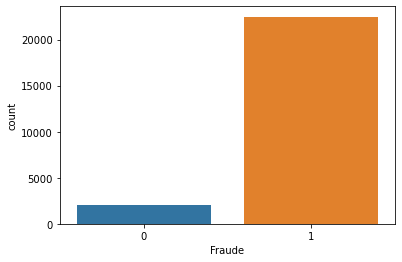

In [71]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.countplot(Assure['Fraude'],label="Count")
plt.show()

In [72]:
Assure.drop(['DATE_AFFECTATION'],axis=1,inplace=True)

In [73]:
# apply le on categorical feature columns
mask = Assure.dtypes==object
categorical_cols =  Assure.columns[mask].tolist()
# import labelencoder
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
Assure[categorical_cols] = Assure[categorical_cols].apply(lambda col: le.fit_transform(col))
Assure[categorical_cols].head(10)

gender  gouvernorat  secteur_activite  date_permis  compagnie_actuelle  \
0       0           11                 4         5103                   0   
1       1           10                 6         1791                  11   
2       1           10                 6         1791                  11   
3       1            0                 2         3995                   5   
4       0            3                 7          955                  13   
5       0            3                 7          955                  13   
6       0            3                 7          955                  13   
7       0            3                 7          955                  13   
8       0            3                 7          955                  13   
9       0            3                 7          955                  13   

   usage  ancienne_compagnie  dateEffetPolice  Etat_Police  naturePolice  
0      3                   8             3250            2             0  
1      2                   5             3254            2             0  
2      2                   5             3337            2             0  
3      0                   3             3257            2             0  
4      2                   5             3260            2             0  
5      2                   5             3260            2             0  
6      2                   5             3333            2             0  
7      2                   5             3333            2             0  
8      2                   5             3333            2             0  
9      2                   5             3351            2             0

In [74]:
from imblearn.under_sampling import RandomUnderSampler
under = RandomUnderSampler()

In [75]:
x=Assure.drop(['Fraude'],axis=1)
y=Assure['Fraude']

In [76]:
x_under, y_under = under.fit_resample(x, y)

In [77]:
x_under.to_excel(r'C:\Users\chihe\Desktop\ProjetPI\pi\pi\x_under.xlsx', index = False)
y_under.to_excel(r'C:\Users\chihe\Desktop\ProjetPI\pi\pi\y_under.xlsx', index = False)

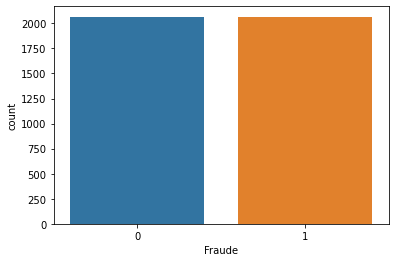

In [78]:
sns.countplot(y_under,label="Count")
plt.show()

In [115]:
#getting the feature after feature selection, we dropped 'typePolice' because it was not statistically significative on the chi squared test
features=['Nb_Sinistre_c', 'NombreTotalSinistres', 'Duree', 'classeBonusMalusCompagnie',
       'ClasseBonusMalusCGA', 'Etat_Police', 'naturePolice',
       'typeIntermediaire','gouvernorat', 'secteur_activite', 'compagnie_actuelle', 'usage',
       'age_vehicule','ancienne_compagnie','satisfaction']
x_under=x_under[features]

In [116]:
x_under

Nb_Sinistre_c  NombreTotalSinistres  Duree  classeBonusMalusCompagnie  \
0                 0                     2      2                          9   
1                 0                     2      3                          9   
2                 0                     2      2                          9   
3                 0                     4      0                          9   
4                 0                     5      2                          9   
...             ...                   ...    ...                        ...   
4127              1                    35      2                          3   
4128             72                  1186      0                          4   
4129              0                     4      0                          3   
4130              0                     0      0                          1   
4131              0                     1      0                          3   

      ClasseBonusMalusCGA  Etat_Police  naturePolice  typeIntermediaire  \
0                       9            0             0                  1   
1                       9            2             0                  1   
2                       9            0             0                  1   
3                       9            2             0                  1   
4                       9            2             0                  1   
...                   ...          ...           ...                ...   
4127                   11            2             0                  1   
4128                   11            2             0                  2   
4129                    9            2             0                  1   
4130                    8            2             0                  1   
4131                    9            2             1                  1   

      gouvernorat  secteur_activite  compagnie_actuelle  usage  age_vehicule  \
0               0                 9                  12      2             9   
1               0                 9                  12      2             9   
2               0                 9                  12      2             9   
3              11                 3                  13      3            18   
4               5                 1                   2      3            13   
...           ...               ...                 ...    ...           ...   
4127            1                 7                  13      2            15   
4128            6                 7                   8      2             3   
4129            9                 3                   6      3            19   
4130            0                 5                   1      2             1   
4131            3                 8                  13      2            12   

      ancienne_compagnie  satisfaction  
0                      9             2  
1                      9             2  
2                      9             2  
3                      6             3  
4                      3             4  
...                  ...           ...  
4127                   9             5  
4128                  14             5  
4129                   7             3  
4130                   5             3  
4131                  11             2  

[4132 rows x 15 columns]

In [117]:
x_under.to_excel(r'C:\Users\chihe\Desktop\ProjetPI\pi\pi\x_under.xlsx', index = False)
y_under.to_excel(r'C:\Users\chihe\Desktop\ProjetPI\pi\pi\y_under.xlsx', index = False)

In [81]:
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [82]:
train_X, test_X, train_y, test_y = train_test_split(
   x_under, y_under, test_size=0.2,random_state=0)

Text(0, 0.5, 'Erreur')

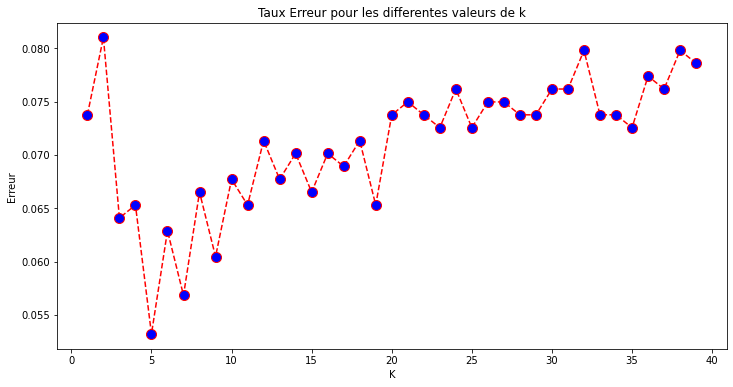

In [83]:
from sklearn.neighbors import KNeighborsClassifier
error = []
# Calculer l'erreur pour k entre 1 et 40 
#Pour chaque itération, l'erreur moyenne pour les valeurs prédites 
#de l'ensemble de test est calculée et sauvegardée ds la liste Erreur.
for i in range(1, 40):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(train_X, train_y)
    pred_i = knn_model.predict(test_X)
    error.append(np.mean(pred_i != test_y))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K')
plt.ylabel('Erreur')

In [84]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(train_X, train_y)
predictions_knn = knn.predict(test_X)
acc_knn = accuracy_score(test_y, predictions_knn)
acc_knn

0.9467956469165659

In [85]:
y_pred=knn.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       425
           1       0.97      0.92      0.94       402

    accuracy                           0.95       827
   macro avg       0.95      0.95      0.95       827
weighted avg       0.95      0.95      0.95       827



In [86]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(train_X, train_y)
predictions = sgd.predict(test_X)
acc_sgd = accuracy_score(test_y, predictions)
acc_sgd

0.9818621523579202

In [87]:
y_pred=sgd.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       425
           1       0.99      0.97      0.98       402

    accuracy                           0.98       827
   macro avg       0.98      0.98      0.98       827
weighted avg       0.98      0.98      0.98       827



In [88]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(train_X, train_y)
predictions = gaussian.predict(test_X)
acc_gaussian = accuracy_score(test_y, predictions)
acc_gaussian

0.6904474002418379

In [89]:
y_pred=gaussian.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.95      0.76       425
           1       0.88      0.42      0.57       402

    accuracy                           0.69       827
   macro avg       0.76      0.68      0.66       827
weighted avg       0.75      0.69      0.67       827



In [90]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
acc_lda = accuracy_score(test_y, predictions)
acc_lda

0.966142684401451

In [91]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=15)
clf.fit(train_X, train_y)
predictions = clf.predict(test_X)
acc_lda = accuracy_score(test_y, predictions)
acc_lda

0.9854897218863361

In [92]:
y_pred=clf.predict(test_X)
print(classification_report(test_y, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       425
           1       0.98      0.99      0.99       402

    accuracy                           0.99       827
   macro avg       0.99      0.99      0.99       827
weighted avg       0.99      0.99      0.99       827



In [93]:
y=Assure[Assure.Fraude==0]["ClasseBonusMalusCGA"]
x=Assure[Assure.Fraude==0][features].drop(['ClasseBonusMalusCGA','classeBonusMalusCompagnie'],axis=1)

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(x.values,y.values, test_size = 0.2, random_state = 0)

In [95]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9806763285024155


In [96]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[  7   0   0   0   0   0   0   0   0   0]
 [  3   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   1   0   0   0   0   0]
 [  1   0   0   1   0   0   0   0   0   0]
 [  0   0   1   0   0   0   0   0   0   0]
 [  0   0   0   0   0   4   1   0   0   0]
 [  0   0   0   0   0   0   6   0   0   0]
 [  0   0   0   0   0   0   0 378   0   0]
 [  0   0   0   0   0   0   0   0   8   0]
 [  0   0   0   0   0   0   0   0   1   0]]


In [97]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression( multi_class='multinomial', penalty='none', solver='newton-cg')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9637681159420289


In [98]:
print(confusion_matrix(y_test, y_pred))

[[  7   0   0   0   0   0   0   0   0   0]
 [  1   0   1   0   1   0   0   0   0   0]
 [  0   2   0   1   0   0   0   0   0   0]
 [  0   0   1   1   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   1   3   1   0   0   0   0]
 [  0   0   0   0   0   0   6   0   0   0]
 [  0   0   1   0   0   0   0 377   0   0]
 [  0   0   0   0   0   0   1   0   7   0]
 [  0   0   0   0   0   0   0   0   1   0]]


In [109]:
ab=pd.read_excel('x_under.xlsx')

In [110]:
ab.shape

(4132, 16)

In [111]:
ab.columns

Index(['Nb_Sinistre_c', 'NombreTotalSinistres', 'Duree',
       'classeBonusMalusCompagnie', 'ClasseBonusMalusCGA', 'Etat_Police',
       'naturePolice', 'typeIntermediaire', 'gouvernorat', 'secteur_activite',
       'compagnie_actuelle', 'usage', 'age_vehicule', 'nb_sinistres',
       'ancienne_compagnie', 'satisfaction'],
      dtype='object')

In [114]:
ab[['NombreTotalSinistres','nb_sinistres']]

NombreTotalSinistres  nb_sinistres
0                        2             0
1                        2             0
2                        2             0
3                        4             3
4                        5             0
...                    ...           ...
4127                    35             4
4128                  1186             0
4129                     4             2
4130                     0             2
4131                     1             1

[4132 rows x 2 columns]

In [ ]:
nb_sin_c,nb_sin_total,Duree,Classe_Bonus_Malus_Compagnie,Classe_Bonus_Malus_CGA,etat_police,nature_police,type_intermédiaire,gouvernorat,secteur_activite,compagnie_actuelle,usage,age_vehicule,ancienne_compagnie


In [118]:
ab=pd.read_excel("x_under.xlsx") 
ac=pd.read_excel("y_under.xlsx") 

In [119]:
ab.shape

(4132, 15)

In [120]:
ac.shape

(4132, 1)

In [121]:
BonusMalus.columns

Index(['CodeBonusMalus_id', 'CodePolice_id', 'CodeVehicule_id',
       'CodeAssure_id', 'CodeSouscripteur_id', 'codeUsage', 'ETAT_VEHICULE',
       'DATE_AFFECTATION', 'classeBonusMalus', 'classeBonusMalusCompagnie',
       'coefBonusMalus'],
      dtype='object')